In [1]:
%matplotlib widget
import sys
import numpy as np
sys.path.append('/home/jleland/Coding/Projects/flopter/')
import flopter.spice.utils as su
import flopter.core.constants as c
import flopter.core.lputils as lpu
# import matplotlib
# matplotlib.use('nbagg')

**Magnum Parameters (First Shot)**

In [6]:
n_e = 1e16
T_e = 5
m_i = c.PROTON_MASS
B = 0.8
theta = np.radians(10)
q = 1

In [2]:
n_e = 1e18
T_e = 5
m_i = 900 * c.ELECTRON_MASS
B = 0.8
theta = np.radians(10)
q = 1

In [4]:
n_e = 1e19
T_e = 1.6
m_i = c.PROTON_MASS
B = 0.8
theta = np.radians(10)
q = 1

In [3]:
n_e = 1.4e19
T_e = 1.6
m_i = c.PROTON_MASS
B = 0.8
theta = np.radians(10)
q = 1

In [111]:
n_e = 1.4e20
T_e = 1.6
m_i = c.PROTON_MASS
B = 0.8
theta = np.radians(10)
q = 1

**Value Calculations**

In [4]:
debye = su.get_lambda_d(n_e, T_e)
larmor = su.get_larmor_r(T_e, B, m_i, q)
probe_length = 3e-3

print('Ksi: {}'.format(su.get_ksi(n_e, T_e, q, m_i, B)))
print('Lambda_D: {}'.format(debye))
print('Larmor: {:.3g} m'.format(larmor))
print('Larmor: {:.3g} mm'.format(larmor * 1000))
print(m_i / c.ELECTRON_MASS)
print('r_Li/L: \t{}'.format(larmor/probe_length))
print('r_Li/lambda_D: \t{}'.format(larmor/debye))
print('L/lambda_D: \t{}'.format(probe_length/debye))

Ksi: 12.028220946115727
Lambda_D: 1.6622799720325184e-05
Larmor: 0.0002 m
Larmor: 0.2 mm
900.0
r_Li/L: 	0.06664756925970068
r_Li/lambda_D: 	12.028220946115727
L/lambda_D: 	180.47501326336817


In [5]:
print((c.ATOMIC_MASS_UNIT * 1.007825032241 )/ c.ELECTRON_MASS)
print((c.ATOMIC_MASS_UNIT * 1.00794 )/ c.ELECTRON_MASS)
print(c.P_E_MASS_RATIO)
print(c.PROTON_MASS/c.ELECTRON_MASS)

1837.152647174698
1837.36222057884
1836.1526759556054
1836.1526759556054


**Probe Geometry Declaration (Choose one and press shift + enter)**

In [4]:
# Probe S Parameters
L = 3e-3
g = 2e-3
d_perp = 0.129e-3
poss_exp = 0.22025615519528585-3

In [6]:
# Probe S - Machined Parameters
L = 3e-3
g = 2e-3
d_perp = 0.3e-3
poss_exp = 0.0035984495326001112-3

In [5]:
# Probe L Parameters
L = 5e-3
g = 1e-3
d_perp = 0.081635e-3
poss_exp = 0.09325339674977874e-3

In [15]:
# Probe L - Machined Parameters
L = 5e-3
g = 1e-3
d_perp = 0.3e-3
poss_exp = 0.0

In [3]:
# Probe B Parameters
L = 5e-3  # m
g = 1e-3  # m
d_perp = 0.081635e-3
poss_exp = 0.09325339674977874e-3

In [11]:
L_lang = 5e-3           # m
a_lang = 2e-3           # m
b_lang = 3.34e-3        # m
g_lang = 1e-3           # m
d_perp_lang = 0.081635e-3      # m
theta_f_reg = np.radians(75)
theta_p = np.radians(10.0)

test_probe = lpu.AngledTipProbe(a_lang, b_lang, L_lang, g_lang, d_perp_lang, theta_f_reg, theta_p)
print(lpu.MagnumProbesOld().probe_l.calc_exposed_lengths(np.radians(10)))

(0.00035610226652867246, 0.0)


**Simulation length calculations**

In [7]:
def haterise(value, debye_length=1):
    return int(value/debye_length)

In [8]:
def find_next_power(length):
    x = 1
    while x < length:
        x *= 2
    return x

In [16]:
relief = 5 * larmor

larmor_hat = haterise(larmor, debye)
L_hat = haterise(L, debye)
g_hat = haterise(g, debye)
d_perp_hat = haterise(d_perp, debye)
rel_hat = haterise(relief, debye)
exp_hat = haterise(poss_exp, debye)
wedge_h_hat = int(L_hat*np.tan(np.radians(10)))

print('Probe length: \t{:}'.format(L_hat))
print('Gap length: \t{:}'.format(g_hat))
print('Drop length: \t{:}'.format(d_perp_hat))
print('Relief length: \t{:}'.format(rel_hat))
print('Exposed length: {:}'.format())
print('Wedge height: \t{:}'.format(wedge_h_hat))
print()

wall_width = int(1.2 * wedge_h_hat)

probe_LE_height = max(int(exp_hat * 1.2), wedge_h_hat)
rearwall_relief = haterise(1e-3, debye)
rearwall_height = larmor_hat

forewall_min_h = probe_LE_height + wedge_h_hat
rearwall_min_h = rearwall_height + rearwall_relief
forewall_padding = max(0, forewall_min_h - rearwall_min_h)
rearwall_padding = max(0, rearwall_min_h - forewall_min_h)
    
forewall_height_corr = probe_LE_height + d_perp_hat + forewall_padding
rearwall_height_corr = rearwall_height + rearwall_padding

min_height = rel_hat + probe_LE_height + wedge_h_hat + forewall_padding
min_width = L_hat + (2*g_hat) + (2*wall_width)
sim_height = find_next_power(min_height)
sim_width = find_next_power(min_width)

spare_width = sim_width - min_width
padding_width = int(spare_width / 2)

tip_points = [
    [padding_width + wall_width + g_hat, probe_LE_height + forewall_padding],
    [padding_width + wall_width + g_hat + L_hat, probe_LE_height + forewall_padding],
    [padding_width + wall_width + g_hat + L_hat, probe_LE_height + wedge_h_hat + forewall_padding]
]
tip_points_unpadded = [
    [wall_width + g_hat, probe_LE_height + forewall_padding],
    [wall_width + g_hat + L_hat, probe_LE_height + forewall_padding],
    [wall_width + g_hat + L_hat, probe_LE_height + wedge_h_hat + forewall_padding]
]

print('Minimum sim height: \t {}\t({})'.format(min_height, sim_height))
print('Minimum sim width: \t {}\t({})'.format(min_width, sim_width))

Probe length: 	300
Gap length: 	60
Drop length: 	18
Relief length: 	60
Exposed length: 0
Wedge height: 	52

Minimum sim height: 	 196	(256)
Minimum sim width: 	 544	(1024)


**Simulation Window Plotting**

In [10]:
import matplotlib.pyplot as plt

In [17]:
plt.figure()

sim_objects = []

sim_window = plt.Rectangle((10, 10), sim_width, sim_height, fc='w', ec='k')
sim_objects.append(sim_window)

fore_wall = plt.Rectangle((10, 10), wall_width + padding_width, forewall_height_corr, fc='gray', ec='k')
sim_objects.append(fore_wall)

rear_wall = plt.Rectangle((10 + sim_width - padding_width - wall_width, 10), padding_width + wall_width, 
                          rearwall_height_corr, fc='gray', ec='k')
sim_objects.append(rear_wall)

probe_body = plt.Rectangle((10 + padding_width + wall_width + g_hat, 10), L_hat, 
                           probe_LE_height + forewall_padding, fc='b', ec='b')
sim_objects.append(probe_body)

tip_draw_points = [[a + 10 for a in b] for b in tip_points]
probe_tip = plt.Polygon(tip_draw_points, fc='b', ec='b')
sim_objects.append(probe_tip)

# Draw the lower 
ww_arrow = wall_width + padding_width
plt.arrow(ww_arrow + 10, forewall_height_corr + 10, g_hat, -g_hat*np.tan(np.radians(10)), color='r')
plt.arrow(ww_arrow + 10, forewall_height_corr + 10, -ww_arrow, ww_arrow*np.tan(np.radians(10)), color='r')

plt.arrow(ww_arrow + 10, forewall_height_corr + 10, (g_hat + 100), -(g_hat + 100)*np.tan(np.radians(1)), color='g')
plt.arrow(ww_arrow + 10, forewall_height_corr + 10, -ww_arrow, ww_arrow*np.tan(np.radians(1)), color='g')

for so in sim_objects:
    plt.gca().add_patch(so)

plt.axis('scaled')
plt.show()

FigureCanvasNbAgg()

In [22]:
print('Sim width: {}'.format(sim_width))
print('Sim height: {}'.format(sim_height))
print()
print('Forewall y: [{},{}]'.format(0, wall_width + padding_width))
print('Forewall x: [{},{}]'.format(0, forewall_height_corr))
print()
print('Rearwall y: [{},{}]'.format(sim_width - wall_width - padding_width, sim_width))
print('Rearwall x: [{},{}]'.format(0, rearwall_height_corr))
print()
# print('Gap x: [{},{}]'.format(wall_width, min_width - wall_width))
# print('Gap y: [{},{}]'.format(0, wall_height))
# print()
print('Probe body y: [{},{}]'.format(wall_width + g_hat, wall_width + g_hat + L_hat))
print('Probe body x: [{},{}]'.format(0, probe_LE_height + forewall_padding))
print()
print('Probe tip y: [{},{},{}]'.format(tip_points[0][0],tip_points[1][0],tip_points[2][0]))
print('Probe tip x: [{},{},{}]'.format(tip_points[0][1],tip_points[1][1],tip_points[2][1]))

Sim width: 64
Sim height: 32

Forewall y: [0,11]
Forewall x: [0,8]

Rearwall y: [53,64]
Rearwall x: [0,1]

Probe body y: [12,42]
Probe body x: [0,8]

Probe tip y: [17,47,47]
Probe tip x: [8,8,13]


**Unpadded Simulation Window**

In [12]:
plt.axes()

sim_objects = []

sim_window = plt.Rectangle((10, 10), min_width, min_height, fc='w', ec='k')
sim_objects.append(sim_window)

fore_wall = plt.Rectangle((10, 10), wall_width, forewall_height_corr, fc='gray', ec='k')
sim_objects.append(fore_wall)

rear_wall = plt.Rectangle((10 + min_width - wall_width, 10), wall_width, 
                          rearwall_height_corr, fc='gray', ec='k')
sim_objects.append(rear_wall)

probe_body = plt.Rectangle((10 + wall_width + g_hat, 10), L_hat, 
                           probe_LE_height + forewall_padding, fc='b', ec='k')
sim_objects.append(probe_body)

tip_draw_points_unpadded = [[a + 10 for a in b] for b in tip_points_unpadded]
probe_tip = plt.Polygon(tip_draw_points_unpadded, fc='b', ec='k')
sim_objects.append(probe_tip)

for so in sim_objects:
    plt.gca().add_patch(so)

plt.axis('scaled')
plt.show()

/home/jleland/.local/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [12]:
print('Sim width: {}'.format(min_width))
print('Sim height: {}'.format(min_height))
print()
print('Forewall y: [{},{}]'.format(0, wall_width))
print('Forewall x: [{},{}]'.format(0, forewall_height_corr))
print()
print('Rearwall y: [{},{}]'.format(min_width - wall_width, min_width))
print('Rearwall x: [{},{}]'.format(0, rearwall_height_corr))
print()
# print('Gap x: [{},{}]'.format(wall_width, min_width - wall_width))
# print('Gap y: [{},{}]'.format(0, wall_height))
# print()
print('Probe body y: [{},{}]'.format(wall_width + g_hat, wall_width + g_hat + L_hat))
print('Probe body x: [{},{}]'.format(0, probe_LE_height + forewall_padding))
print()
print('Probe tip y: [{},{},{}]'.format(tip_points_unpadded[0][0], 
                                       tip_points_unpadded[1][0], 
                                       tip_points_unpadded[2][0]))
print('Probe tip x: [{},{},{}]'.format(tip_points_unpadded[0][1], 
                                       tip_points_unpadded[1][1], 
                                       tip_points_unpadded[2][1]))

Sim width: 74
Sim height: 18

Forewall y: [0,4]
Forewall x: [0,7]

Rearwall y: [70,74]
Rearwall x: [0,1]

Probe body y: [23,51]
Probe body x: [0,6]

Probe tip y: [23,51,51]
Probe tip x: [6,6,10]


**Algorithm for finding if point is within a polygon**

In [4]:
# Adapted from C algorithm found, doesn't work.

def precalc_values(polygon):
    poly_corners = len(polygon[0])
    j = poly_corners - 1
    constant = np.zeros(poly_corners)
    multiple = np.zeros(poly_corners)
    
    for i in range(poly_corners):
        if polygon[0][j] == polygon[0][i]:
            constant[i] = polygon[1][i]
            multiple[i] = 0
        else:
            constant[i] = polygon[1][i] - (polygon[0][i] * polygon[1][j]) / (polygon[0][j] - polygon[0][i]) + (polygon[0][i] * polygon[1][i]) / (polygon[0][j] - polygon[0][i])
            multiple[i] = (polygon[1][j] - polygon[1][i]) / (polygon[0][j] - polygon[0][i])
    return constant, multiple

def is_in_polygon(polygon, x, y):
    constant, multiple = precalc_values(polygon)
    poly_corners = len(polygon[0])
    j = poly_corners - 1
    
    odd_nodes = False
    
    for i in range(poly_corners):
        if (polygon[0][i] < y) and (polygon[0][j] >= y) or (polygon[0][j] < y and polygon[0][i] >= y):
            odd_nodes ^= y * multiple[i] + constant[i] < x
    return odd_nodes

In [16]:
polygon_points = [[0, 0], [0, 2], [1, 2], [1, 0]]
polygon = list(zip(*polygon_points))

print(polygon_points)
print(polygon)

[[0, 0], [0, 2], [1, 2], [1, 0]]
[(0, 0, 1, 1), (0, 2, 2, 0)]


In [23]:
x0, y0 = 0.5, 0.5

In [24]:
x1, y1 = 2.5, 0.5

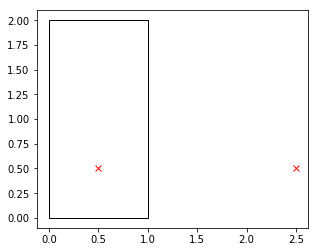

In [25]:
plt.axes()
sim_objects = []

# Polygon
polygon_draw = plt.Polygon(polygon_points, fc='w', ec='k')
sim_objects.append(polygon_draw)

# Point
point_draw = plt.plot(x0, y0, 'rx')
point_draw = plt.plot(x1, y1, 'rx')

for so in sim_objects:
    plt.gca().add_patch(so)

plt.axis('scaled')
plt.show()

In [28]:
print(is_in_polygon(polygon, x0, y0))
print(is_in_polygon(polygon, x1, y1))

False
False


In [34]:
import matplotlib.path as mpltPath

path = mpltPath.Path(polygon_points)
inside2 = path.contains_points([[x0, y0], [x1, y1]])
print(inside2)

[ True False]


# TODO: Make this a flopter object and add in an input file generator